In [466]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

In [467]:
dataset = 'rel-f1'
task = 'driver-position'

In [468]:
base_results_path = os.path.join('results', f"{dataset}_{task}_metrics.json")
pretrained_results_path = os.path.join('results', f"{dataset}_{task}_pretrain_metrics.json")   
multi_task_pretrained_results_path = os.path.join('results', f"{dataset}_{task}_pretrain_multi_metrics.json")                        

In [469]:
with open(base_results_path, 'r') as f:
    base_results = json.load(f)

with open(pretrained_results_path, 'r') as f:
    pretrained_results = json.load(f)

with open(multi_task_pretrained_results_path, 'r') as f:
    multi_task_pretrained_results = json.load(f)

In [470]:
def collect_metric(results, metric, key='test'):
    metric_values = []
    for run in results:
        if key in results[run]:
            key_results = results[run][key]
            if type(key_results) is dict and metric in key_results:
                metric_values.append(key_results[metric])
            elif type(key_results) is list:
                run_results = []
                for res in key_results:
                    if metric in res:
                        run_results.append(res[metric])
                metric_values.append(run_results)
    return np.array(metric_values)

In [471]:
base_mae = collect_metric(base_results, 'mae')

pretrain_mae = collect_metric(pretrained_results, 'mae')

multi_task_pretrain_mae = collect_metric(multi_task_pretrained_results, 'mae')

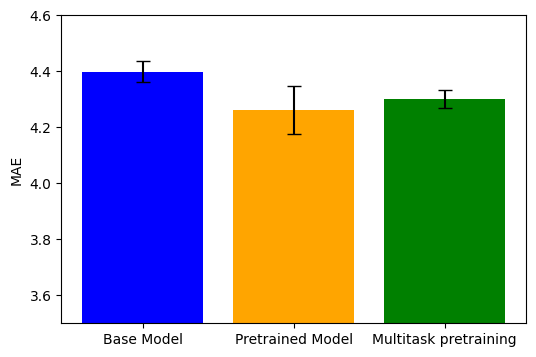

In [472]:
base_mean = np.mean(base_mae)
base_se = np.std(base_mae) / np.sqrt(len(base_mae))

pretrain_mean = np.mean(pretrain_mae)
pretrain_se = np.std(pretrain_mae) / np.sqrt(len(pretrain_mae))

multi_task_mean = np.mean(multi_task_pretrain_mae)
multi_task_se = np.std(multi_task_pretrain_mae) / np.sqrt(len(multi_task_pretrain_mae))

plt.figure(figsize=(6, 4))
bars = plt.bar(
    ['Base Model', 'Pretrained Model', 'Multitask pretraining'], 
    [base_mean, pretrain_mean, multi_task_mean], 
    yerr=[base_se, pretrain_se, multi_task_se], 
    color=['blue', 'orange', 'green'],
    capsize=5
)
plt.ylabel('MAE')
plt.ylim(3.5, 4.6)

plt.show()

In [473]:
metric = 'r2'

base_val = collect_metric(base_results, metric=metric, key='val')

pretrain_val = collect_metric(pretrained_results, metric=metric, key='val')

multitask_val = collect_metric(multi_task_pretrained_results, metric=metric, key='val')

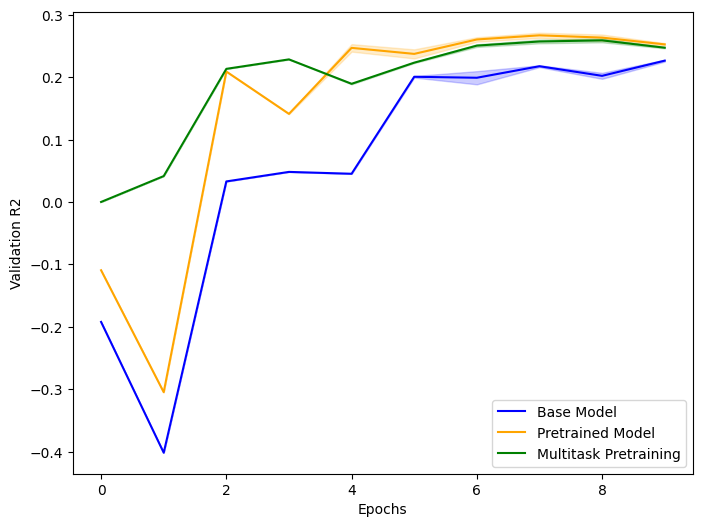

In [474]:
val_mean = np.mean(base_val, axis=0)
val_se = np.std(base_val, axis=0) / np.sqrt(base_val.shape[0])

pretrain_val_mean = np.mean(pretrain_val , axis=0)
pretrain_val_se = np.std(pretrain_val, axis=0) / np.sqrt(pretrain_val.shape[0])

multi_task_val_mean = np.mean(multitask_val , axis=0)
multi_task_val_se = np.std(multitask_val, axis=0) / np.sqrt(multitask_val.shape[0])

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(val_mean, label='Base Model', color='blue')
ax.fill_between(range(len(val_mean)), val_mean - val_se, val_mean + val_se, color='blue', alpha=0.2)
ax.plot(pretrain_val_mean, label='Pretrained Model', color='orange')
ax.fill_between(range(len(pretrain_val_mean)), pretrain_val_mean - pretrain_val_se, pretrain_val_mean + pretrain_val_se, color='orange', alpha=0.2)
ax.plot(multi_task_val_mean, label='Multitask Pretraining', color='green')
ax.fill_between(range(len(multi_task_val_mean)), multi_task_val_mean - multi_task_val_se, multi_task_val_mean + multi_task_val_se, color='green', alpha=0.2)

ax.set_xlabel('Epochs')
ax.set_ylabel(f'Validation {metric.upper()}')

ax.legend()
plt.show()

In [475]:
base_train_loss = collect_metric(base_results, "loss", key='train')

pretrain_train_loss = collect_metric(pretrained_results, "loss", key='train')

multi_task_train_loss = collect_metric(multi_task_pretrained_results, "loss", key='train')

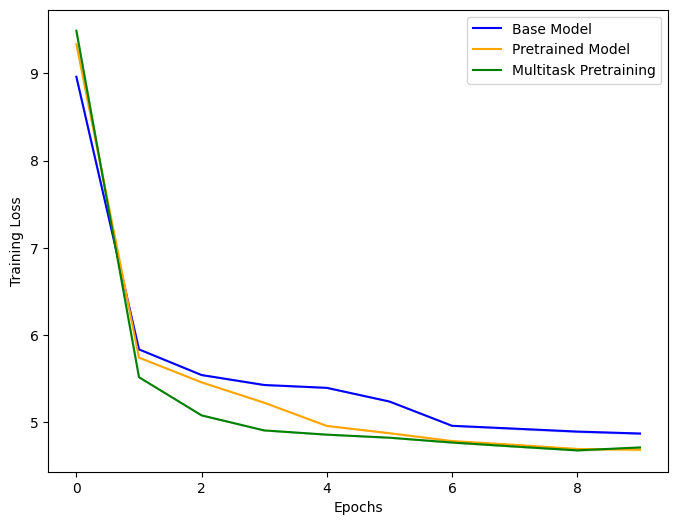

In [476]:
train_mean = np.mean(base_train_loss, axis=0)
train_se = np.std(base_train_loss, axis=0) / np.sqrt(base_train_loss.shape[0])

pretrain_train_mean = np.mean(pretrain_train_loss, axis=0)
pretrain_train_se = np.std(pretrain_train_loss, axis=0) / np.sqrt(pretrain_train_loss.shape[0])

multi_task_train_mean = np.mean(multi_task_train_loss, axis=0)
multi_task_train_se = np.std(multi_task_train_loss, axis=0) / np.sqrt(multi_task_train_loss.shape[0])

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_mean, label='Base Model', color='blue')
ax.fill_between(range(len(train_mean)), train_mean - train_se, train_mean + train_se, color='blue', alpha=0.2)
ax.plot(pretrain_train_mean, label='Pretrained Model', color='orange')
ax.fill_between(range(len(pretrain_train_mean)), pretrain_train_mean - pretrain_train_se, pretrain_train_mean + pretrain_train_se, color='orange', alpha=0.2)
ax.plot(multi_task_train_mean, label='Multitask Pretraining', color='green')
ax.fill_between(range(len(multi_task_train_mean)), multi_task_train_mean - multi_task_train_se, multi_task_train_mean + multi_task_train_se, color='green', alpha=0.2)
ax.set_xlabel('Epochs')
ax.set_ylabel('Training Loss')
ax.legend()
plt.show()